# 나이브베이즈 분류기

- 메일 스팸 분류기
- 컴퓨터 침입차단시스템
- 질병 진단
- 도서관 도서분류기

### 이진분류 / 다중분류

### 날씨에 따른 축구 경기 유무 분석하기

과거 데이터를 먼저 학습시킨 후 모델을 만들어, 그 모델을 기반으로 어떤 날씨가 주어졌을 때 경기를 진행할 지 멈출지를 판단하는 것이 주 목적이다.

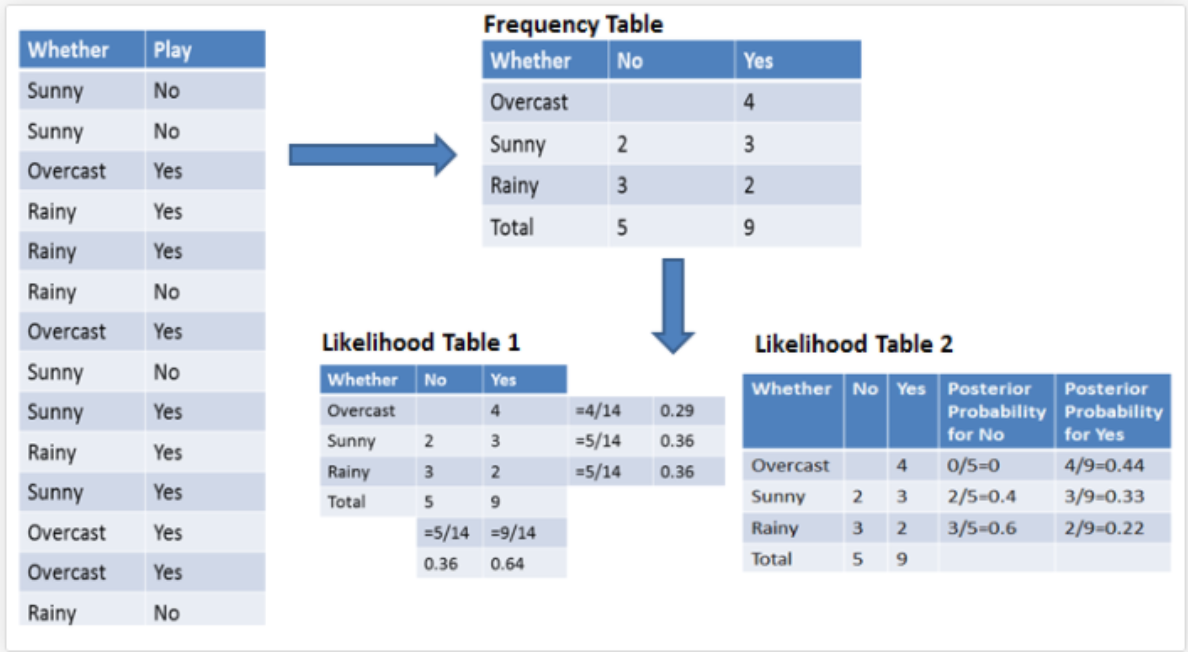

## 문제1] 날씨가 overcat(흐림)일 때 경기할 확률은?

**P(Yes|Overcast) = P(|Overcast|Yes) P(Yes) / P(Overcast)** 베이즈 정리

### 1. 사전 확률

P(Overcast) = 4/14 = 0.29

P(Yes) = 9/14 = 0.64

### 2. 사후 확률

P(Overcast|Yes) = 4/9 = 0.44

### 3. 베이즈 정리 공식에 대입

P(Yes|Overcast) = P(|Overcast|Yes) P(Yes) / P(Overcast) 

= 0.44 * 0.64 / 0.29

In [ ]:
0.44 * 0.64 / 0.29

.

# 문제2] overcat(흐림)일 때 경기취소 확률은?

P(No|Overcast) = P(Overcast|No) P(No) / P(Overcast) = 0 * 0.36 / 0.29 = 0

# Feature 가 Mulitple 일 경우

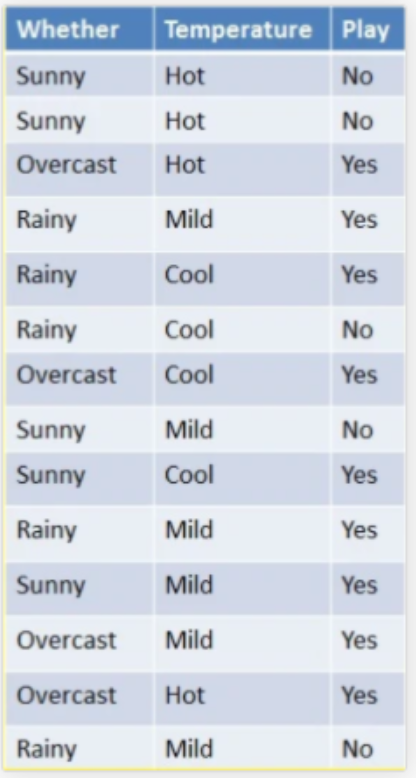

### 문제3] 날씨 Overcast, 기온 Mild 일 때 경기 확률은?

### 문제4] 날씨 Overcast, 기온 Mild 일 때 경기  취소 확률은?

# 사이킷런을 활용한 나이브베이즈 다중 분류 : 날씨, 기온

- Feature(Weather, Temp), 1개의 Label(Play) -> datasets

In [ ]:
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny',
          'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

Temp = ['Hot', 'Hot', 'Hot', ' Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild',
       'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes','No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

#### Feature Encoding : 문자를 숫자형으로 변환한다. (string -> int)

In [ ]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)


#### Overcast : 0, Rainy : 1,  Sunny : 2

같은 방식으로 Temp, play 값도 인코딩해준다.

In [ ]:
Temp_encoded = le.fit_transform(Temp)
label = le.fit_transform(play)

print("Temp : ", Temp_encoded)
print("Play : ", label)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
Temp_encoded = le.fit_transform(Temp)
label = le.fit_transform(play)

print("Weather : ", weather_encoded)
print("Temp    : ", Temp_encoded)
print("Play    : ", label)

### 인코딩된 두개의 Feature 를 결합시킨다.

In [ ]:
feature = zip(weather_encoded, Temp_encoded)
feature = list(feature)

print(feature)

#### 나이브베이즈 모델링

- 1) 모델 생성
- 2) 데이터 Fitting
- 3) 성능평가

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(feature, label)

predicted = model.predict([[0,2]]) # 0 : Overcast, 2: Mild
print("Overcat_Mild : ", predicted)

# 시간에 따른 맥주 주문 현황

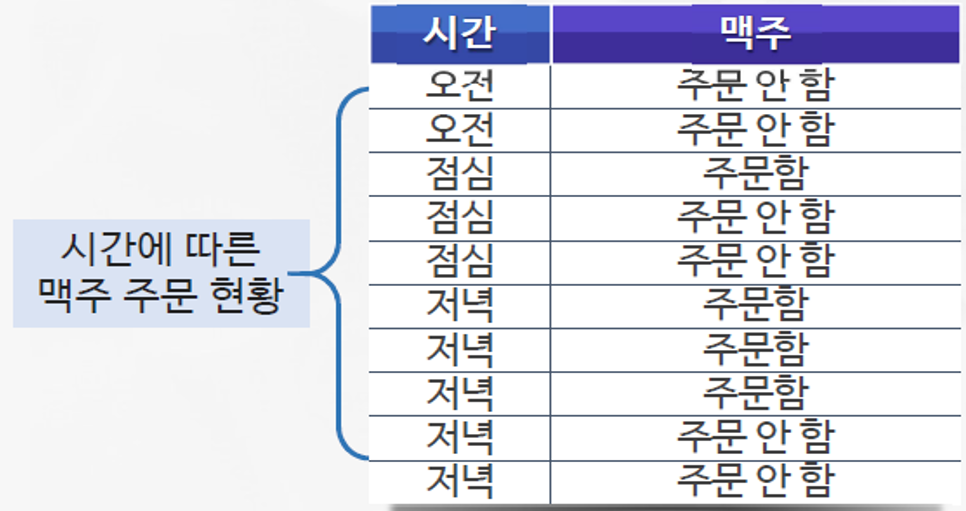

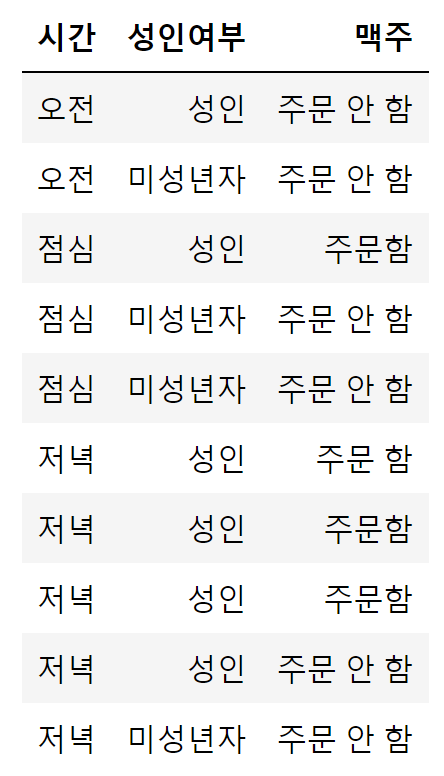

# 가우시안 나이브베이즈 분류 : iris 분류

특징들의 값들이 분포되어 있다는 가정하에 조건부 확률을 계산한다.

주로, 연속적인 성질이 있는 특징의 데이터를 분류하는데 적합하다.


In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

# 모델링의 동일한 결과 출력을 구한다.
import numpy as np

np.random.seed(5)

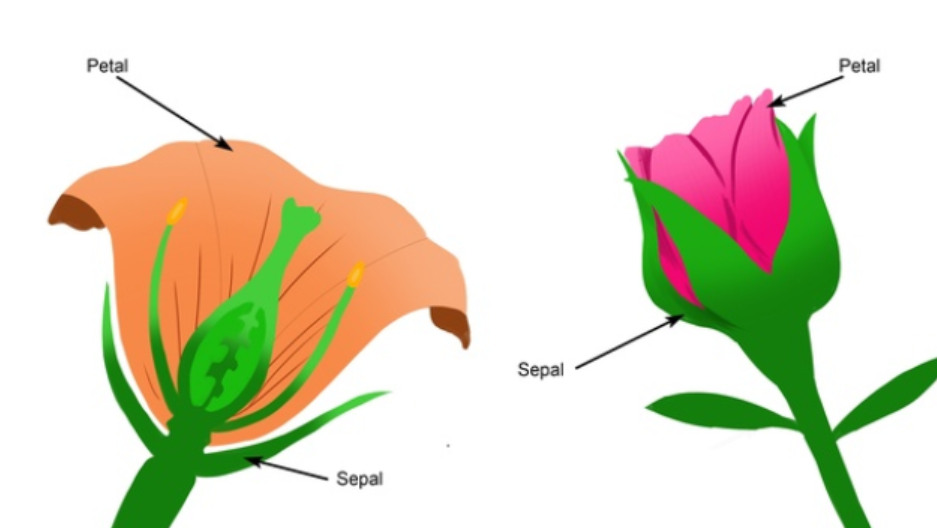

### iris 데이터 시각화

붓꽃 종류 = setosa, versicolor, virginica

In [5]:
dataset = load_iris()

dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
dataset = load_iris()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# 숫자값을 문자값으로 출력시킨다.
df.target = df.target.map({0: 'setosa', 1:"versicolor", 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- sepal length (cm)	: 꽃받침의 길이
- sepal width (cm)	: 꽃받침의 너비(폭)
- petal length (cm)	: 꽃잎의 길이
- petal width (cm)  : 꽃잎의 너비(폭)

In [7]:
# 특정필드의 항목을 구한다

df.target.value_counts()

versicolor    50
virginica     50
setosa        50
Name: target, dtype: int64

In [10]:
# 시각화를 위하여 데이터를 분류값별로 나눈다.

setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

### sepal length (cm) : 꽃받침의 길이 시각화

<AxesSubplot:label='2c4e711d-264c-48fa-b892-2c08bc0b8090'>

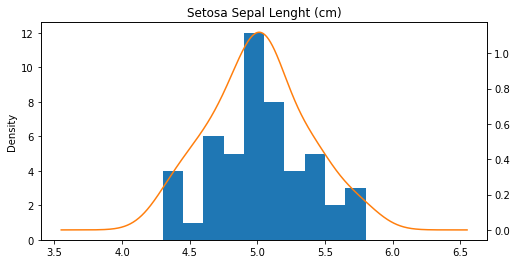

In [13]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y = True,
                                   title = 'Setosa Sepal Lenght (cm)',
                                   figsize = (8, 4))

<AxesSubplot:label='ab5b1c64-4535-4622-925d-245a6e9cb404'>

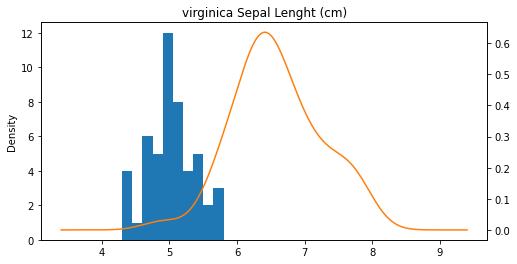

In [18]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y = True,
                                   title = 'virginica_df Sepal Lenght (cm)',
                                   figsize = (8, 4))

<AxesSubplot:label='3b0d3ae4-8794-42c0-95fb-91d99721f2da'>

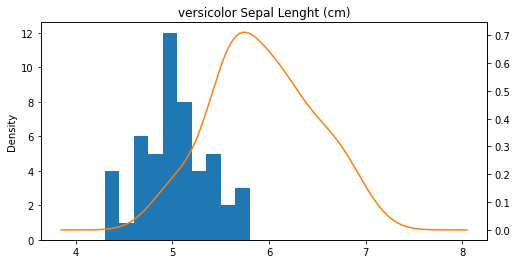

In [17]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y = True,
                                   title = 'versicolor Sepal Lenght (cm)',
                                   figsize = (8, 4))

<AxesSubplot:label='c4f044c5-33fc-4521-b848-24e174d9d7e1'>

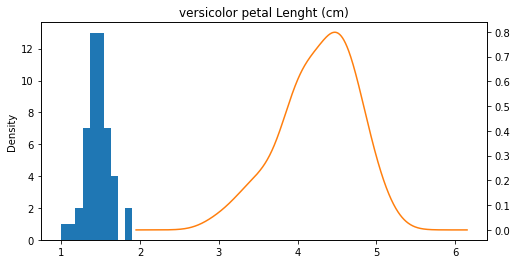

In [22]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y = True,
                                   title = 'versicolor petal Lenght (cm)',
                                   figsize = (8, 4))

<AxesSubplot:label='df420712-b931-45e9-8fd3-5cc76c98205d'>

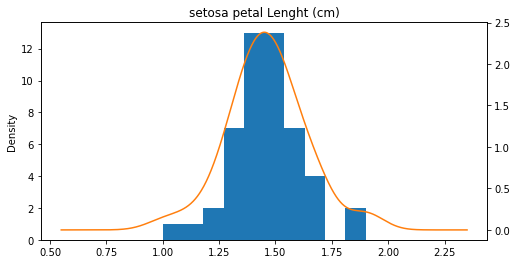

In [21]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y = True,
                                   title = 'setosa petal Lenght (cm)',
                                   figsize = (8, 4))

# 학습데이터 & 테스트 데이터 나누기

In [23]:
# 테스트 20%

X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                    dataset.target, 
                                                    test_size=0.2)

# 가우시안 모델링

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,predicted))

In [ ]:
# 정확도
accuracy_score(y_test, predicted)

In [ ]:
# 실제값과 비교
print(metrics.confusion_matrix(expected, predicted))

# -------------------------------------------------------------------

# 베르누이 나이브베이즈 분류 : 스팸메일 분류

데이터의 특징이 0 또는 1로 표현되는 경우

예> 주사위를 10번 던진다.

1-1번, 2-2번, 3-3번, 4-4번 나온 경우 -> (1,1,1,1,0,0)   # 1은 숫자,   0은 숫자아님

#### 실습 모듈 호출

In [28]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score

np.random.seed(5)

- free game only today -------------------------- 오늘만 무료 게임
- cheapest flight deal ---------------------------- 저렴한 항공편 거래
- limited time offer only today only today------- 오늘만 오늘만 기간 한정 제공
- today meeting schedule ----------------------- 오늘 회의 일정
- your flight schedule attached ----------------- 비행 스케줄 첨부
- your credit card statement -------------------- 신용 카드 명세서

In [29]:
email_list = [
    {'email title': 'free game only today', 'spam':True},
    {'email title': 'cheapest flight deal', 'spam':True},
    {'email title': 'limited time offer only today only today', 'spam':True},
    {'email title': 'today meeting schedule', 'spam':False},
    {'email title': 'your flight schedule attached', 'spam':False},
    {'email title': 'your credit card statement', 'spam':False}
]

df = pd.DataFrame(email_list)

In [30]:
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


#### 데이터 다듬기 : 인코딩 (부울값을 숫자로 치환 : Treu = 1, False = 0)

In [31]:
df['label'] = df['spam'].map({True:1,False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


#### 학습에 사용할 데이터와 분류값을 나눈다.

이메일제목 으로 학습을 진행한 후 label을 사용해 스팸메일 여부를 판단한다.

In [32]:
df_x = df['email title']
df_y = df['label']

베르누이 나이브베이즈의 입력 데이터는 고정된 크기의 벡터로, 0과 1로 구분된 데이터이어야 한다.

sklearn의 CountVertorizer 를 사용하여 쉽게 구현할 수 있다.

In [33]:
cv = CountVectorizer(binary = True)
x_traincv = cv.fit_transform(df_x)

In [37]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

벡터로 인코딩된 이메일 제목에 어떤 단어들이 포함되어 있는지 확인한다.

In [38]:
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [39]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

#### 베르누이 학습 모델링

In [42]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [46]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x=test_df["email title"]
test_y=test_df["label"]
x_testcv=cv.transform(test_x)

#### 테스트

In [47]:
predictions = bnb.predict(x_testcv)

#### 정확도

In [49]:
accuracy_score(test_y, predictions)

0.8333333333333334

# 다항분포 나이브베이즈 분류 : 영화감상(좋아요/나빠요)

데이터의 특징이 출현 횟수로 표현되는 경우

예> 주사위를 10번 던진다.

1-1번, 2-2번, 3-3번, 4-4번 나온 경우 -> (1,2,3,4,0,0)

## Q> 학습데이터에 없는 데이터가 나올 경우는 ???

#### Smoothing 스무딩

학습데이터에 없는 데이터가 나오면 확률은 0이 된다.

이런 문제를 해결하기 위해 학습데이터에 없는 데이터가 나오면 빈도수에 1을 더해서 확률이 0이 되는 것을 방지시킨다.